In [95]:
import numpy as np

import methods
import oracles
import matplotlib.pyplot as plt

# from random import sample
from collections import defaultdict
from plot_trajectory_2d import plot_levels, plot_trajectory

In [68]:
plt.rcParams["figure.figsize"] = (16, 8)

In [33]:
orth = lambda phi: np.array([[np.cos(phi), np.sin(phi)], [-np.sin(phi), np.cos(phi)]])

In [35]:
S = orth(1.5)

In [70]:
matrices_dict = {}
for k in [5, 10, 100]:
    A = np.diag([1, k])
    matrix = S.dot(A).dot(S.T)
    print(f"Matrix with conditional number {k} is:")
    print(matrix)
    matrices_dict[k] = matrix

Matrix with conditional number 5 is:
[[4.97998499 0.28224002]
 [0.28224002 1.02001501]]
Matrix with conditional number 10 is:
[[9.95496623 0.63504004]
 [0.63504004 1.04503377]]
Matrix with conditional number 100 is:
[[99.50462858  6.9854404 ]
 [ 6.9854404   1.49537142]]


In [94]:
# k = 5 diff strategies, starting point
# Смотрим на кол-во итераций

In [113]:
ful_res_dict = defaultdict(dict)


### k = 5

In [114]:
k = 5
curr_matrix = matrices_dict[k]
b = np.random.randint(1, 2 * k, size=(2,))
n = 20
# lets generate 20 starting points and write last run of GD to plot in later
plot_hist = {'Constant': [], 'Armijo': [], 'Wolfe': []}
for i in range(n):
    ful_res_dict[k][i] = {}
    start_point = np.random.randint(1, 10 * k, size=(2,)) 
    ful_res_dict[k][i]['coord'] = start_point
    oracle = oracles.QuadraticOracle(curr_matrix, b)
    for method in ['Constant', 'Armijo', 'Wolfe']:
        gd = methods.GradientDescent(oracle, start_point, line_search_options={'method': method})
        gd.run(500)
        ful_res_dict[k][i][method] = len(gd.hist["x"])
        ful_res_dict[k][i]['final_point'] = gd.hist['x_star']
        if i == n - 1:
            plot_hist[method] = gd.hist['x']

Number of iterations: 501


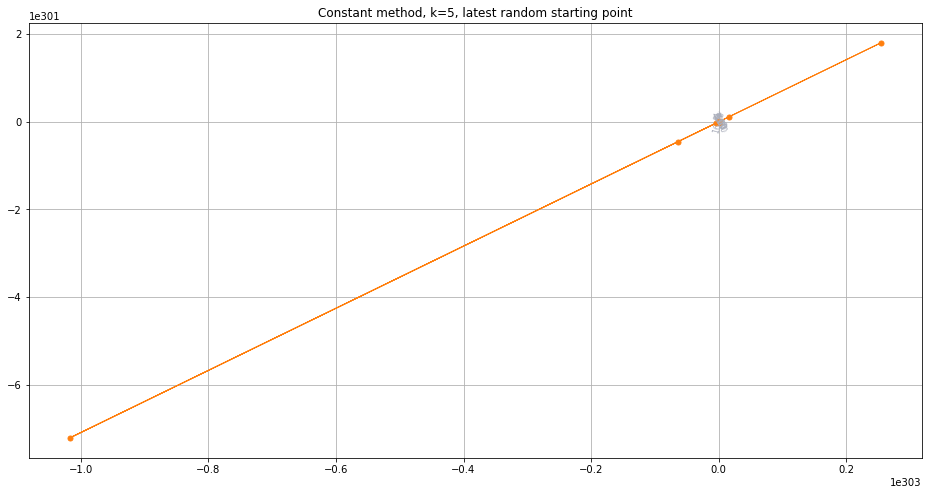

In [118]:
method = 'Constant'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])
print(f"Number of iterations: {len(plot_hist[method])}")

Number of iterations: 22


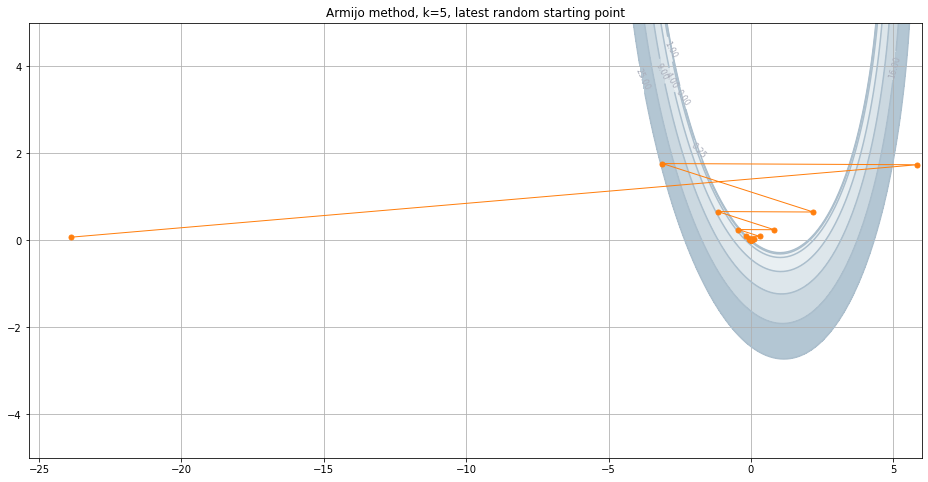

In [119]:
method = 'Armijo'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])
print(f"Number of iterations: {len(plot_hist[method])}")

Number of iterations: 3


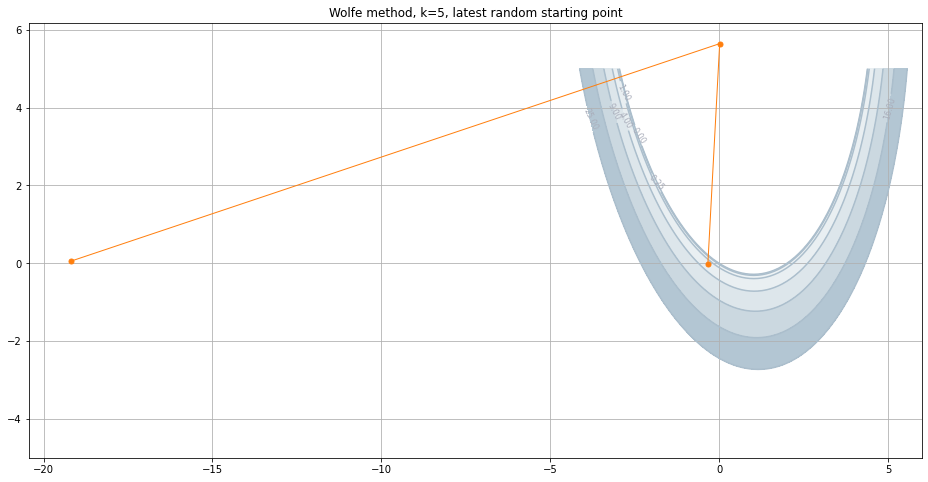

In [120]:
method = 'Wolfe'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])
print(f"Number of iterations: {len(plot_hist[method])}")

### k = 10

In [121]:
k = 10
curr_matrix = matrices_dict[k]
b = np.random.randint(1, 2 * k, size=(2,))
n = 20
# lets generate 20 starting points and write last run of GD to plot in later
plot_hist = {'Constant': [], 'Armijo': [], 'Wolfe': []}
for i in range(n):
    ful_res_dict[k][i] = {}
    start_point = np.random.randint(1, 10 * k, size=(2,)) 
    ful_res_dict[k][i]['coord'] = start_point
    oracle = oracles.QuadraticOracle(curr_matrix, b)
    for method in ['Constant', 'Armijo', 'Wolfe']:
        gd = methods.GradientDescent(oracle, start_point, line_search_options={'method': method})
        gd.run(500)
        ful_res_dict[k][i][method] = len(gd.hist["x"])
        ful_res_dict[k][i]['final_point'] = gd.hist['x_star']
        if i == n - 1:
            plot_hist[method] = gd.hist['x']

Number of iterations: 501


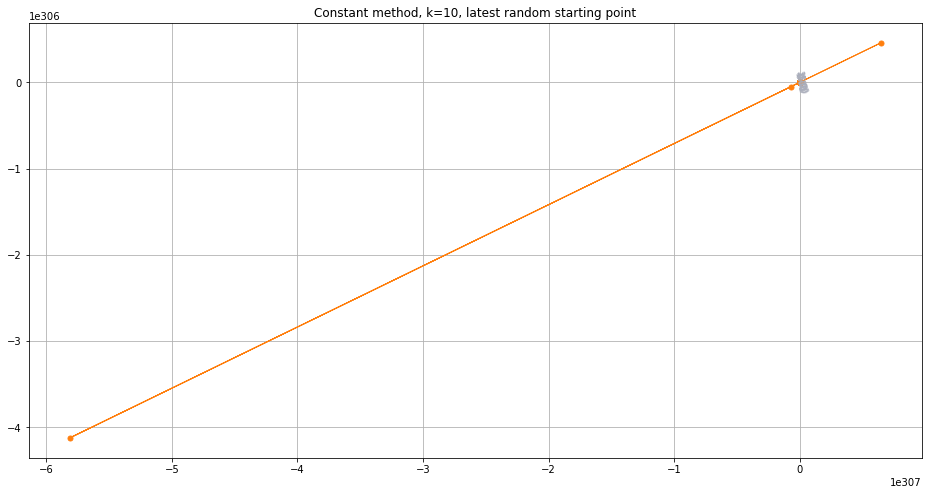

In [122]:
method = 'Constant'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])
print(f"Number of iterations: {len(plot_hist[method])}")

Number of iterations: 42


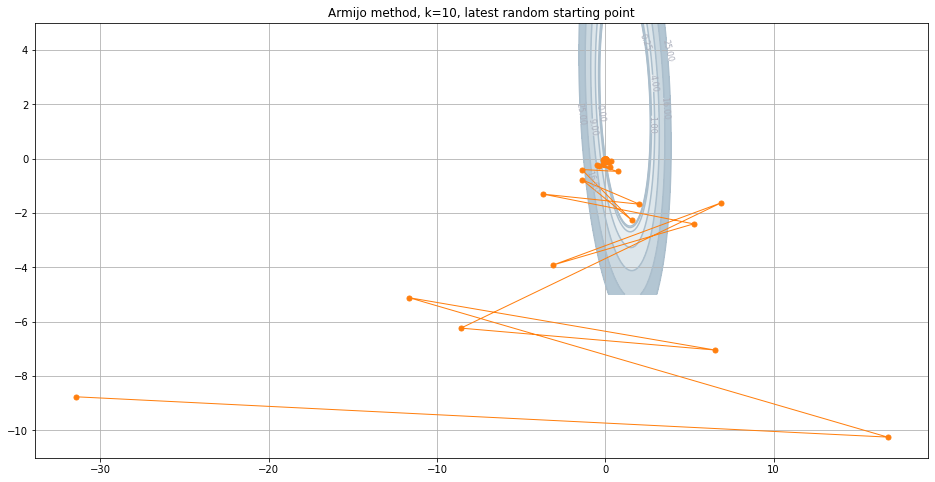

In [123]:
method = 'Armijo'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])
print(f"Number of iterations: {len(plot_hist[method])}")

Number of iterations: 3


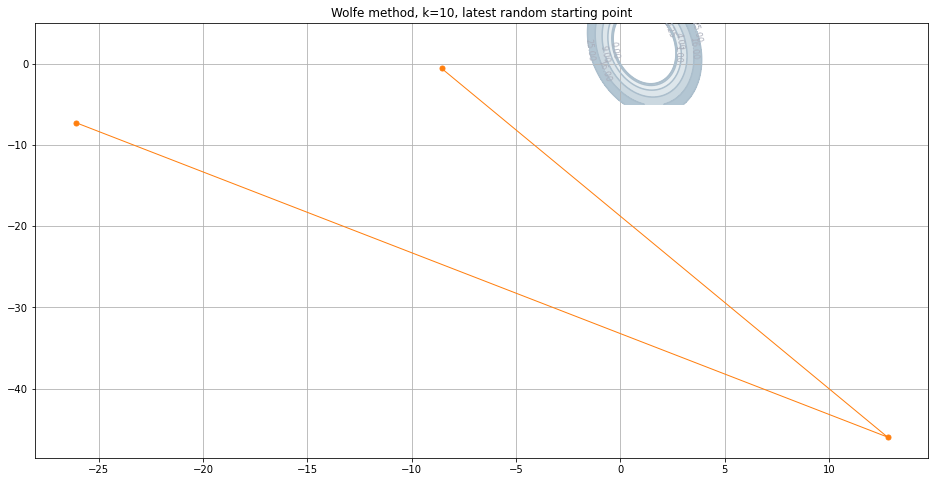

In [124]:
method = 'Wolfe'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])
print(f"Number of iterations: {len(plot_hist[method])}")

### k = 100

In [130]:
k = 100
curr_matrix = matrices_dict[k]
b = np.random.randint(1, 2 * k, size=(2,))
n = 20
# lets generate 20 starting points and write last run of GD to plot in later
plot_hist = {'Constant': [], 'Armijo': [], 'Wolfe': []}
for i in range(n):
    ful_res_dict[k][i] = {}
    start_point = np.random.randint(1, 10 * k, size=(2,)) 
    ful_res_dict[k][i]['coord'] = start_point
    oracle = oracles.QuadraticOracle(curr_matrix, b)
    for method in ['Constant', 'Armijo', 'Wolfe']:
        gd = methods.GradientDescent(oracle, start_point, line_search_options={'method': method})
        gd.run(500)
        ful_res_dict[k][i][method] = len(gd.hist["x"])
        ful_res_dict[k][i]['final_point'] = gd.hist['x_star']
        if i == n - 1:
            plot_hist[method] = gd.hist['x']

Number of iterations: 501


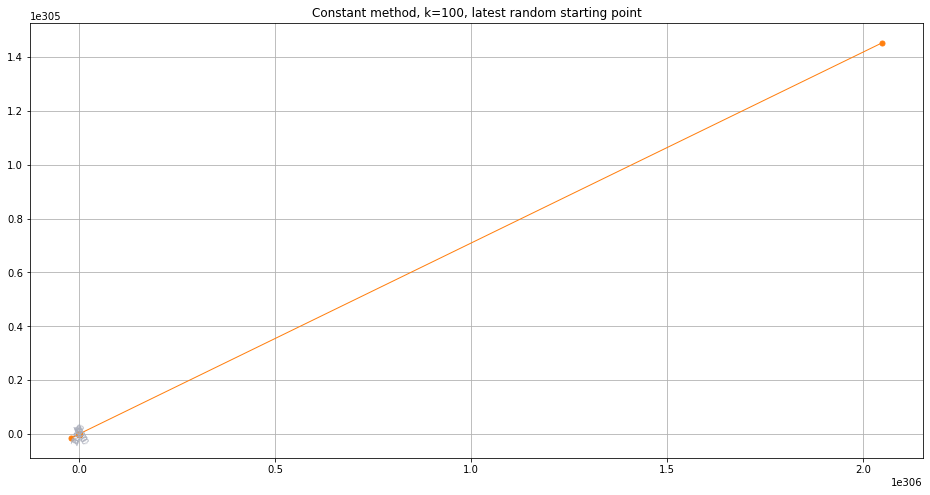

In [131]:
method = 'Constant'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])
print(f"Number of iterations: {len(plot_hist[method])}")

Number of iterations: 298


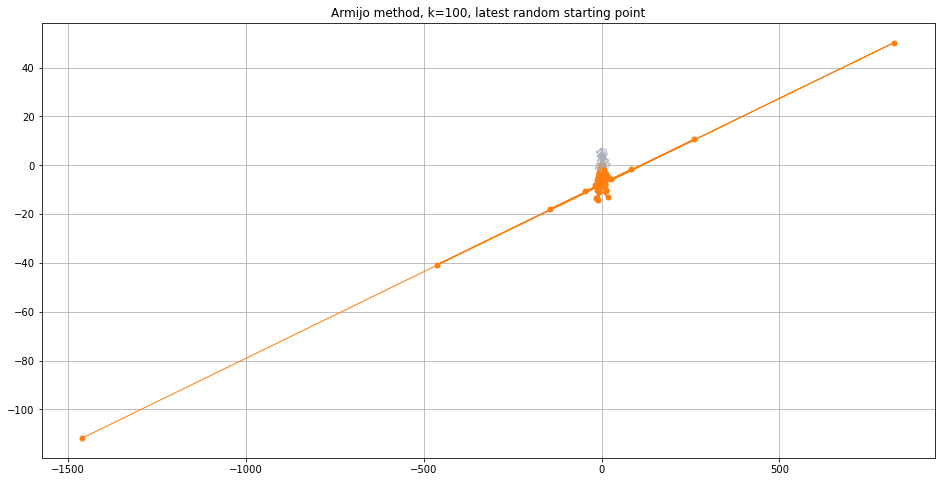

In [132]:
method = 'Armijo'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])
print(f"Number of iterations: {len(plot_hist[method])}")

Number of iterations: 3


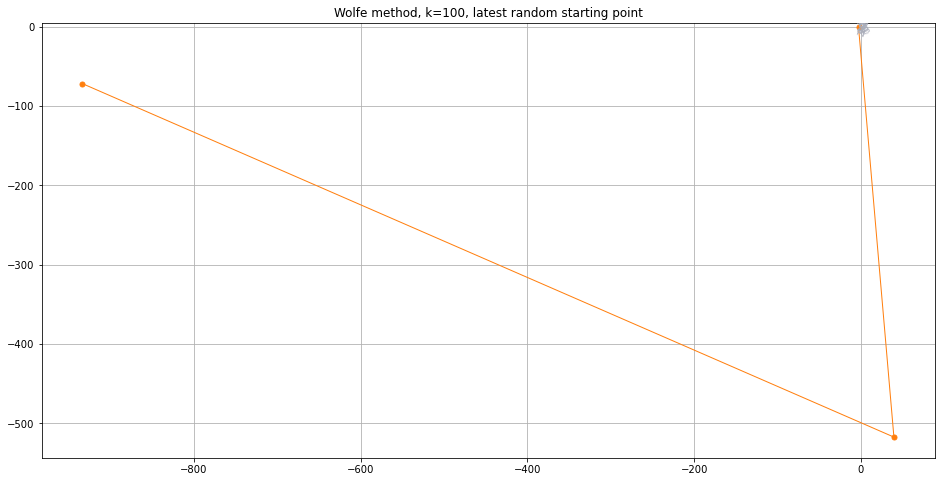

In [133]:
method = 'Wolfe'
plt.title(f"{method} method, k={k}, latest random starting point")
plot_levels(oracle.func)
plot_trajectory(oracle.func, plot_hist[method])
print(f"Number of iterations: {len(plot_hist[method])}")

Постарайтесь ответить на вопрос: как зависит поведение методов от числа обусловленно-
сти, от начальной точки, от стратегии выбора длины шага?

In [138]:
ful_res_dict

defaultdict(dict,
            {5: {0: {'coord': array([44, 47]),
               'Constant': 501,
               'final_point': array([0.51198298, 8.68173297]),
               'Armijo': 22,
               'Wolfe': 3},
              1: {'coord': array([26, 21]),
               'Constant': 501,
               'final_point': array([0.51198298, 8.68173297]),
               'Armijo': 22,
               'Wolfe': 3},
              2: {'coord': array([24,  5]),
               'Constant': 501,
               'final_point': array([0.51198298, 8.68173297]),
               'Armijo': 19,
               'Wolfe': 3},
              3: {'coord': array([ 5, 24]),
               'Constant': 501,
               'final_point': array([0.51198298, 8.68173297]),
               'Armijo': 23,
               'Wolfe': 3},
              4: {'coord': array([18, 19]),
               'Constant': 501,
               'final_point': array([0.51198298, 8.68173297]),
               'Armijo': 22,
               'Wolfe': 3},

In [135]:
import pandas as pd

In [139]:
df = pd.DataFrame(ful_res_dict[5])

In [140]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
coord,"[44, 47]","[26, 21]","[24, 5]","[5, 24]","[18, 19]","[38, 39]","[19, 14]","[7, 32]","[12, 45]","[39, 3]","[33, 45]","[27, 49]","[19, 32]","[19, 46]","[17, 14]","[24, 19]","[23, 28]","[5, 28]","[12, 32]","[20, 3]"
Constant,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501
final_point,"[0.511982977783588, 8.681732971641868]","[0.511982977783587, 8.68173297164187]","[0.5119829777835883, 8.681732971641868]","[0.511982977783588, 8.681732971641866]","[0.511982977783587, 8.681732971641868]","[0.5119829777835871, 8.681732971641868]","[0.5119829777835859, 8.681732971641868]","[0.5119298287159346, 8.682020748640916]","[0.5119829777835871, 8.681732971641866]","[0.5119829777835881, 8.68173297164187]","[0.5119829777835871, 8.681732971641868]","[0.511982977783588, 8.681732971641864]","[0.5119829777835867, 8.681732971641868]","[0.5119829777835863, 8.681732971641864]","[0.5119829777835878, 8.681732971641868]","[0.5119829777835871, 8.681732971641868]","[0.5119829777835871, 8.681732971641868]","[0.511935821849982, 8.6819658222058]","[0.5119829777835871, 8.681732971641866]","[0.5119829777835867, 8.68173297164187]"
Armijo,22,22,19,23,22,22,19,23,23,19,23,23,23,23,21,22,22,24,23,22
Wolfe,3,3,3,3,3,3,3,23,3,3,3,3,3,3,3,3,3,25,3,3
